In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.patches import Rectangle

# Exercício 16
**Objetivo: abrir e visualizar uma imagem**

Veja o código abaixo. Ele demonstra como abrir uma matriz e como mostrá-la na tela usando `matplotlib`.

1. O que os eixos da figura representam?
2. Quais são as dimensões da variável `image` e o que elas representam?

<class 'numpy.ndarray'>
(427, 640, 3)


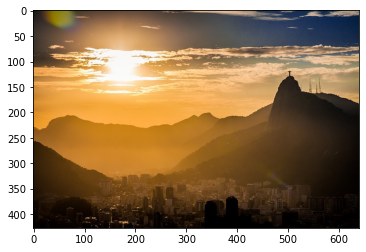

In [ ]:
image = mpimg.imread("rio_de_janeiro.jpg")
print(type(image))
print(image.shape)
plt.figure()
plt.imshow(image)
plt.show()

# Exercício 17
**Objetivo: acessar multiplos elementos de um array de numpy**

Uma maneira de acessar vários elementos de um array de numpy simultaneamente é usar um outro array como indexador. Por exemplo:

In [ ]:
y = np.array([1, 2, 3, 4, 5])
idx = np.array([4, 3, 2])
print(y[idx])

[5 4 3]


In [ ]:
x = np.array([ [1, 2, 3], [2, 3, 4], [5, 6, 7]])
y = np.zeros_like(x)
origem_i = np.array([1, 2])
origem_j = np.array([2, 1])
destino_i = np.array([0, 1])
destino_j = np.array([0, 0])
y[destino_i, destino_j] = x[origem_i, origem_j]
print(y)

[[4 0 0]
 [6 0 0]
 [0 0 0]]


Podemos automatizar esse processo usando um *produto cartesiano*. Ele funciona criando vetores que têm todos os pares $i,j$ de elementos dos vetores que são recebidos como entrada:

In [5]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

a = np.array([ [1, 2, 3], [2, 3, 4], [5, 6, 7]])
X = criar_indices(0, 3, 0, 2)
b = np.zeros_like(a)
b[X[0,:], X[1,:]] = a[X[0,:], X[1,:]]
print(b)

[[1 2 0]
 [2 3 0]
 [5 6 0]]


O código abaixo usa o meshgrid para recortar um pedaço da imagem recebida como entrada.

1. Explique como o código funciona
2. Altere o código para que o pedaço recortado inclua o cristo redentor

(427, 640, 3)


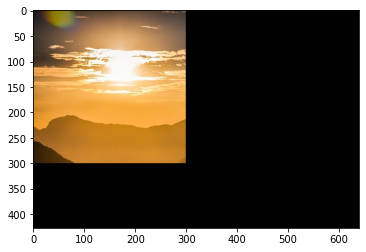

In [46]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)
image_[X[0,:], X[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure()
plt.imshow(image_)
plt.show()

# Exercício 18
**Objetivo: transformar os pixels que buscamos acessar**

Vamos agora implementar uma ideia. Temos uma matriz de índices $X$. Podemos entender esses índices como uma núvem de pontos. Daí então, aplicamos uma transformação sobre ela, modificando a posição dos pixels de destino, isto é:

$$
X_{\text{destino}} = A X
$$

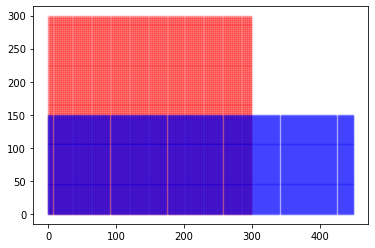

In [47]:
X = criar_indices(0, 300, 0, 300)

A = np.array([[0.5, 0], [0, 1.5]])
Xd = A @ X

plt.figure()
plt.scatter(X[1,:], X[0,:], c='r', s=1, alpha=0.1)
plt.scatter(Xd[1,:], Xd[0,:], c='b', s=1, alpha=0.1)
plt.show()

Essa transformação pode ser usada para mapear pixels na imagem de origem para pixels na imagem de destino! Veja, por exemplo: 

(427, 640, 3)


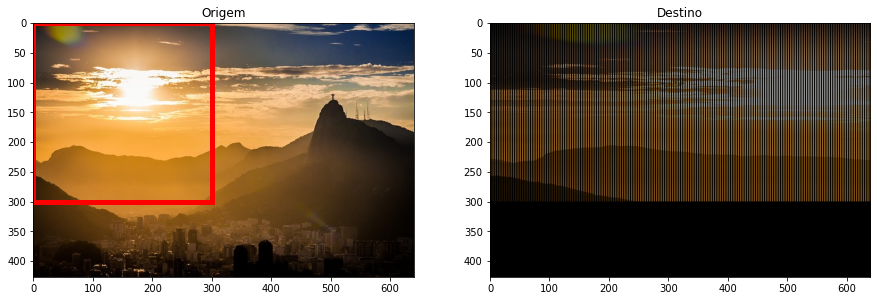

In [63]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)

A = np.array([[1, 0], [0, 3]])
Xd = A @ X
Xd = Xd.astype(int)

filtro = ((Xd[0,:]>= 0 ) & (Xd[0,:] < image_.shape[0]) & (Xd[1,:] < image_.shape[1]))
Xd = Xd[:,filtro]
X = X [:,filtro]

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
# Adiciona o retângulo indicando a área que foi recortada:
plt.gca().add_patch(Rectangle((0,0),300,300,linewidth=5,edgecolor='r',facecolor='none'))

plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

Alterando o código acima, verifique o efeito das seguintes matrizes de transformação $A$:

$$
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
,
\begin{bmatrix}
0 & 1 \\
1 & 0 
\end{bmatrix}
,
\begin{bmatrix}
1 & 0.2 \\
0 & 1 
\end{bmatrix}
,
\begin{bmatrix}
1 & 0 \\
0.2 & 1 
\end{bmatrix}
,
\begin{bmatrix}
1 & 0 \\
0 & 3 
\end{bmatrix}
$$

# Exercício 19
**Objetivo: resolver as dificuldades com pixels fora da imagem**

Quando a matriz de transformação é:
$$
A = 
\begin{bmatrix}
-3 & 0 \\
0 & 3 
\end{bmatrix}
$$

temos o problema de encontrar pixels de destino fora da imagem, gerando um erro.

Uma solução para evitar esse erro é remover os pixels *out-of-bounds* usando um filtro. Por exemplo:

In [54]:
a = np.array([1, 2, 3, 4, 5])
filtro = a > 3
a = a[filtro]
print(a)

[4 5]


Usando um filtro, proponha uma modificação no código anterior para evitar os pixels *out-of-bounds*.

# Exercício 20
**Objetivo: manipular a translação em imagens e fazer efeitos compostos**

O código abaixo implementa uma operação de translação em nosso recorte. Modifique o código para que a translação seja de 50 pixels na horizontal e 50 pixels na vertical.

(3, 90000)
(427, 640, 3)


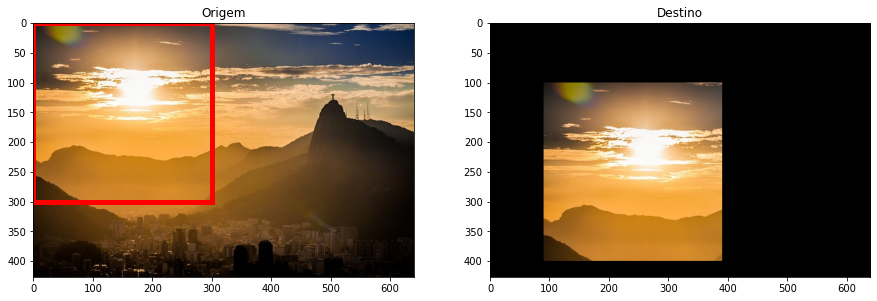

In [64]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)
X = np.vstack ( (X, np.ones( X.shape[1]) ) )

A = np.array([[1, 0, 100], [0, 1, 90], [0, 0,1]])
Xd = A @ X
Xd = Xd.astype(int)
X = X.astype(int)

print(Xd.shape)

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
# Adiciona o retângulo indicando a área que foi recortada:
plt.gca().add_patch(Rectangle((0,0),300,300,linewidth=5,edgecolor='r',facecolor='none'))

plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

# Exercício 21
**Objetivo: aplicar transformações compostas**

Uma matriz que implementa a rotação em 45 graus, na representação que temos até o momento, com uma dimensão adicional, pode ser:

$$
R = 
\begin{bmatrix}
    0.7 & -0.7 & 0\\
    0.7 & 0.7 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

Porém, essa rotação acontece ao redor da origem. Se quisermos rotacionar nossa imagem ao redor de um ponto arbitrário, precisamos, nesta ordem:
1. Transladar a imagem de tal forma que o ponto fique na origem
2. Realizar a rotação
3. Transladar a imagem de volta à sua posição original.

(a) Tomando por base o código abaixo, implemente uma operação de rotação da imagem de destino ao redor do pixel $(150,150)$.

(b) Encontre uma matriz que realiza a transformação do ítem (a) com uma única operação de multiplicação matricial.

(427, 640, 3)


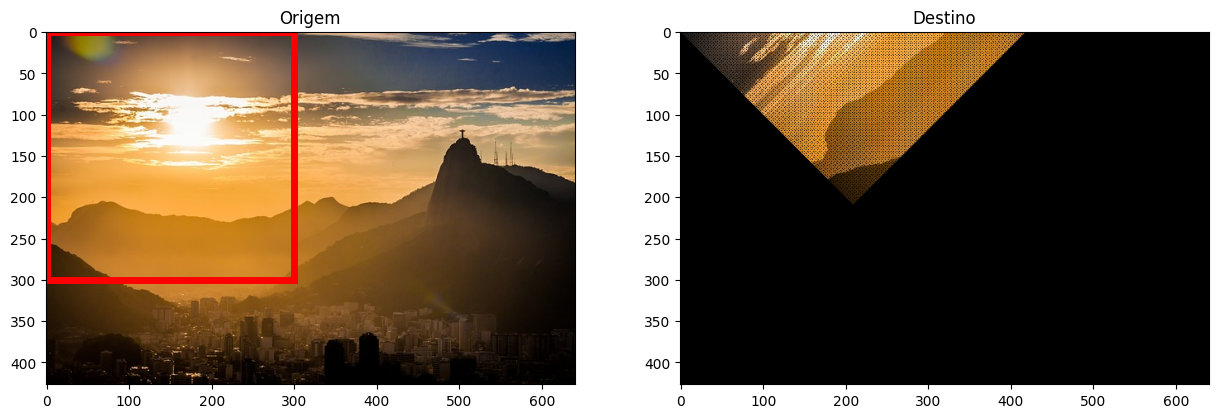

In [8]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)
X = np.vstack ( (X, np.ones( X.shape[1]) ) )

T = np.array([[1, 0, -150], [0, 1, -150], [0, 0,1]])
R = np.array([[0.7, -0.7, 0], [0.7, 0.7, 0], [0, 0,1]]) # Matriz de rotação.

Xd = R @ X
Xd = Xd.astype(int)
X = X.astype(int)

# Troque este código pelo seu código de filtragem de pixels
Xd[0,:] = np.clip(Xd[0,:], 0, image.shape[0])
Xd[1,:] = np.clip(Xd[1,:], 0, image.shape[1])

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
# Adiciona o retângulo indicando a área que foi recortada:
plt.gca().add_patch(Rectangle((0,0),300,300,linewidth=5,edgecolor='r',facecolor='none'))

plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

# Projeto: efeitos de vídeo em tempo real

Até o momento, fizemos transformações de formato em imagens. Vamos agora fazer o mesmo em vídeos em tempo real.

Em nosso repositorio, o arquivo `03-camera-demo.py` tem um pequeno programa que demonstra como capturar uma imagem de uma câmera e mostrá-la na tela em tempo real. A imagem é armazenada internamente numa estrutura `np.array` com `shape=(largura, altura, cores)`, isto é, exatamente o mesmo formato que usamos na imagem da aula.

O objetivo deste projeto é fazer um processador de efeito de vídeo em tempo real que faça o seu *streaming* de vídeo ficar "girando" na tela, como neste exemplo:

<img src="camera_rodando.gif" width=300>

## Algumas anotações teóricas

### Como fazer uma rotação

Uma matriz que realiza uma rotação de $\theta$ radianos ao redor do ponto $(0,0)$ é:

$$
R = 
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) \\
    \cos(\theta) & \cos(\theta)  \\
\end{bmatrix}
$$

Se usarmos a ideia de aumentar uma dimensão, a matriz fica:
$$
R = 
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 \\
    \cos(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

Lembre-se que para rotacionar ao redor de um ponto arbitrário $(x_0, y_0)$ é preciso deslocar esse ponto para a origem (ou seja, realizar uma translação), realizar a rotação e, por último, desfazer a translação.

### Transformações compostas (*composite transformations*)

Estamos representando nossos pixels como as colunas de uma matriz $X$, como fizemos durante a aula. Quando aplicamos uma transformação $A$, encontramos uma matriz $Y=AX$. Podemos aplicar então uma transformação $B$ sobre $Y$, encontrando $Z=BY$. Então:

$$
Z = BY = B A X
$$

Porém, veja, nesta implementação, aplicamos a transformação $A$ sobre *todos* os pixels, e depois aplicamos a transformação $B$ sobre *todos* os pixels. Podemos, porém, calcular uma matriz $C = BA$ e então simplificar essa operação:

$$
Z = BA X = C X
$$

E, agora, usando a matriz $C$, só precisamos iterar por todos os pixels de $X$ uma única vez. Isso pode aumentar significativamente a velocidade em que as transformações são aplicadas.

### Retirando artefatos da imagem

Talvez, ao realizar uma rotação, você veja a sua imagem resultante cheia de pontinhos. Isso acontece porque nem todo ponto na imagem de destino tem um correspondente na imagem de origem. Então, podemos solucionar isso usando a seguinte ideia:

Em nossa implementação da aula, os pixels de destino $X_d$ foram encontrados transformando os pixels de origem $X_o$ por uma matriz $A$, isto é:

$$
X_d = A X_o
$$

Os pixels de $X_o$ estão bem organizados em uma grade, mas os pixels de $X_d$ não, e é isso que leva ao surgimento desses pontinhos pretos no meio da imagem. Porém, nada impede que façamos os pixels de $X_d$ como uma grade, e então encontremos os pixels em $X_o$ correspondentes usando a transformação inversa:

$$
X_o = A^{-1} X_d
$$


## Descrição do projeto

Neste projeto, faremos um processador de vídeo em tempo real em Python. Ele deve ser capaz de, no mínimo, executar uma rotação ao redor do centro da imagem, semelhante à que está no GIF, *em tempo real*.

Anotações importantes:

1. O grupo deve enviar um link para o repositório GitHub onde está localizada a biblioteca.
2. No diretório principal do repositório, deve haver um programa `demo.py`, que, quando executado, inicializa o feed de vídeo e executa os efeitos em tempo real.
3. Como o objetivo do projeto é exatamente implementar as transformações, não é permitido usar bibliotecas externas que realizem as transformações. Se for preciso, bibliotecas externas podem ser usadas para funções que não estão ligadas diretamente à implementação das transformações em si. Toda a parte de álgebra linear, porém, deve ser feita pelo próprio grupo usando multiplicações matriciais em Numpy.

**ENTREGAS**
* Link para o repositório onde está a biblioteca.
* No `README.md` do repositório, deve haver uma discussão sobre que equações foram implementadas para gerar a rotação. Essa discussão deve corresponder ao que foi feito no código.
* Inclua também, no próprio `README.md`, instruções sobre como rodar o `demo.py` e como usar suas funcionalidades.

**DICAS**
* O código-base tem 19 linhas de código. A solução feita pela equipe tem 53 linhas. Isso significa que o programa que estamos tentando fazer não é especialmente longo. Porém, ele tem muitos detalhes.
* Se você não faz ideia sobre por onde começar, é interessante fazer um pequeno programa que realiza uma rotação em uma imagem estática (possivelmente seguindo o roteiro da aula) e então ir evoluindo à partir daí.
* Em matrizes, utilizamos a notação $(i, j)$ em que $i$ são as linhas e $j$ são as colunas. Porém, em imagens, usamos a notação (largura,altura), isto é, a ordem dos índices (vertical/horizontal) é invertido em relação às matrizes!
* Lembre-se de manter anotações sobre o motivo de estar realizando cada uma das operações!

**RUBRICA**

O projeto será avaliado usando a rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue, entregue sem completar o `README.md`, entregue sem implementar a rotação (ver teoria), ou implementação usa bibliotecas prontas para implementar as transformações.  | Não fez |
| E | Entregue, mas o `README.md` não indica como instalar ou rodar o programa, ou a rotação não ocorre ao redor do centro do vídeo. | Entender (-) |
| D | Roda com alguns travamentos ou erros, ou o `README.md` não descreve o modelo matemático que foi aplicado, ou o `README.md` não corresponde ao modelo que foi implementado de fato, ou o programa pode ser facilmente acelerado aplicando a ideia de transformações compostas (ver a teoria). | Entender |
| C | Funciona sem travar e o `README.md` está completo e corresponde ao código ou o processo de rotação gera artefatos (pontos pretos) dentro da imagem (ver teoria). | Compreender (-) |
| C+ | O processo de rotação está correto, mas gera artefatos (distorções indesejadas) **fora** da imagem (por exemplo: frames sobrepostos, etc) | Compreender |
| B | O processo de rotação está correto e não gera artefatos | Aplicar |
| A | O programa obedece a todos os requisitos e o código tem uma correspondência imediata ao modelo matemático descrito no `README.md` | Analisar |
| A+ | O programa funciona perfeitamente e, em adição aos requisitos pedidos, permite interagir com a rotação usando teclado ou mouse, por exemplo controlando a velocidade angular através do mouse. | Avaliar |
| A++ | O programa funciona perfeitamente e, em adição aos requisitos anteriores, incorpora outra transformação controlável, como expansões ou cisalhamentos | Criar |
| A+++ | O programa funciona perfeitamente e, em adição aos requisitos anteriores, permite salvar o vídeo que está sendo feito. | Criar (+) |
